<a href="http://landlab.github.io"><img style="float: left" src="../../../landlab_header.png"></a>

# Stream power, channel steepness, and relief HW

### From the original notebook
The equation at hand
$$
\begin{equation}
 \frac{d z}{d t} = -K_\text{sp} A^{m_{sp}} S^{n_{sp}} + U
\end{equation}
$$
Here, $K_{sp}$ is the erodibility coefficient on fluvial incision, which is thought to be positively correlated with climate wetness, or storminess (this is hard to quantify) and to be negatively correlated with rock strength (again, rock strength is hard to quantify). $m_{sp}$ and $n_{sp}$ are positive exponents, usually thought to have a ratio, $m_{sp}/n_{sp} \approx 0.5$. $A$ is drainage area and $S$ is the slope of steepest descent ($-\frac{dz}{dx}$) where $x$ is horizontal distance (positive in the downslope direction) and $z$ is elevation. (If slope is negative there is no fluvial erosion.) $U$ is an externally-applied rock uplift rate field.

The fluvial erosion term is also known as the stream power equation. Before using this notebook you should be familiar with this equation from class lectures and reading. 

**STUDENTS: Questions to answer before starting this assignment.**

Answer these questions before running the notebook.

1. What do you think will happen to total relief (defined as the maximum minus the minimum elevation, here area is fixed) and channel slope at steady state if $K_{sp}$ is uniformly increased?

*Since at steady state*
$$
U = K_\text{sp} A^{m_{sp}} S^{n_{sp}}
$$
*where $U, A, m_{sp}, n_{sp}$ are constant and the only variables allowed to change are $K_\text{sp}$ and $S$, then to keep the equation balanced if we increase $K_\text{sp}$ the value of $S$ should decrease, and therefore we will get less relief.* 


2. What do you think will happen to total relief and channel slope at steady state if $U$ is uniformly increased?

*Using a similar logic if $K_\text{sp}$ is now constant and we increase $U$ then the value of $S$ should increase to mantain balance, meaning that the relief is likely to go up.*

### now the code starts

In [1]:
# Code block 1

import numpy as np
from matplotlib import pyplot as plt

from landlab import RasterModelGrid, imshow_grid
from landlab.components import (
    ChannelProfiler,
    ChiFinder,
    FlowAccumulator,
    SteepnessFinder,
    StreamPowerEroder,
)
from landlab.io import write_esri_ascii

Make a grid and set boundary conditions. 

In [2]:
# Code Block 2

number_of_rows = 100  # number of raster cells in vertical direction (y)
number_of_columns = 200  # number of raster cells in horizontal direction (x)
dxy = 100  # side length of a raster model cell, or resolution [m]

# Below is a raster (square cells) grid, with equal width and height
mg1 = RasterModelGrid((number_of_rows, number_of_columns), dxy)

# east, north, west, south.
mg1.set_closed_boundaries_at_grid_edges(True, True, True, False)

Here we make the initial grid of elevation of zeros with a very small amount of noise to make a more pleasing network.

In [3]:
# Code Block 3

np.random.seed(77)  # seed set so our figures are reproducible
mg1_noise = (np.random.rand(mg1.number_of_nodes) / 1000.0
             )  # intial noise on elevation gri

# set up the elevation on the grid
z1 = mg1.add_zeros("topographic__elevation", at="node")
z1 += mg1_noise

Set parameters related to time.

In [4]:
# Code Block 4

tmax = 1e6  # time for the model to run [yr] (Original value was 2E6 yr)
dt = 5000  # time step [yr] (Original value was 5000 yr)
total_time = 0  # amount of time the landscape has evolved [yr]
# total_time will increase as you keep running the code.

t = np.arange(0, tmax, dt)  # each of the time steps that the code will run

Set parameters for incision and intializing all of the process components that do the work. We also initialize tools for quantifying the landscape.

In [5]:
# Code Block 5

# Original K_sp value is 1e-5
K_sp = 1.0e-5  # units vary depending on m_sp and n_sp
m_sp = 0.5  # exponent on drainage area in stream power equation
n_sp = 1.0  # exponent on slope in stream power equation

frr = FlowAccumulator(mg1, flow_director='FlowDirectorD8')  # intializing flow routing
spr = StreamPowerEroder(mg1, K_sp=K_sp, m_sp=m_sp, n_sp=n_sp,
                        threshold_sp=0.0)  # initializing stream power incision

theta = m_sp / n_sp
# initialize the component that will calculate channel steepness
sf = SteepnessFinder(mg1, reference_concavity=theta, min_drainage_area=1000.0)
# initialize the component that will calculate the chi index
cf = ChiFinder(mg1,
               min_drainage_area=1000.0,
               reference_concavity=theta,
               use_true_dx=True)

Initialize rock uplift rate. This will need to be changed later.

In [6]:
# Code Block 6

#  uplift_rate [m/yr] (Original value is 0.0001 m/yr)
uplift_rate = np.ones(mg1.number_of_nodes) * 0.0001

Now for the code loop. 

You can rerun Code Block 7 many times, and as long as you don't reset the elevation field (Code Block 3), it will take the already evolved landscape and evolve it even more. If you want to change parameters in other code blocks (e.g. Code Block 5 or 6), you can do that too, and as long as you don't reset the elevation field (Code Block 3) the new parameters will apply on the already evolved topography. 

In [7]:
# Code Block 7

for ti in t:
    z1[mg1.
       core_nodes] += uplift_rate[mg1.core_nodes] * dt  # uplift the landscape
    frr.run_one_step()  # route flow
    spr.run_one_step(dt)  # fluvial incision
    total_time += dt  # update time keeper
    print(total_time)

5000
10000
15000
20000
25000
30000
35000
40000
45000
50000
55000
60000
65000
70000
75000
80000
85000
90000
95000
100000
105000
110000
115000
120000
125000
130000
135000
140000
145000
150000
155000
160000
165000
170000
175000
180000
185000
190000
195000
200000
205000
210000
215000
220000
225000
230000
235000
240000
245000
250000
255000
260000
265000
270000
275000
280000
285000
290000
295000
300000
305000
310000
315000
320000
325000
330000
335000
340000
345000
350000
355000
360000
365000
370000
375000
380000
385000
390000
395000
400000
405000
410000
415000
420000
425000
430000
435000
440000
445000
450000
455000
460000
465000
470000
475000
480000
485000
490000
495000
500000
505000
510000
515000
520000
525000
530000
535000
540000
545000
550000
555000
560000
565000
570000
575000
580000
585000
590000
595000
600000
605000
610000
615000
620000
625000
630000
635000
640000
645000
650000
655000
660000
665000
670000
675000
680000
685000
690000
695000
700000
705000
710000
715000
720000
725000
73000

Plot the topography.

Maximum elevation is  99.9899768152


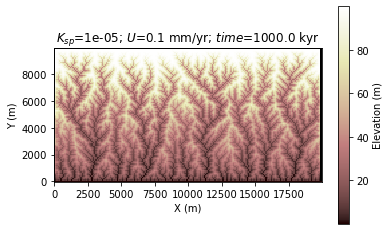

In [8]:
# Code Block 8

imshow_grid(mg1,
            "topographic__elevation",
            grid_units=("m", "m"),
            var_name="Elevation (m)")
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr"
plt.title(title_text)

max_elev = np.max(z1)
print("Maximum elevation is ", np.max(z1))

Plot the slope and area data at each point on the landscape (in log-log space). 

Text(0.5, 1.0, '$K_{sp}$=1e-05; $U$=0.1 mm/yr; $time$=1000.0 kyr')

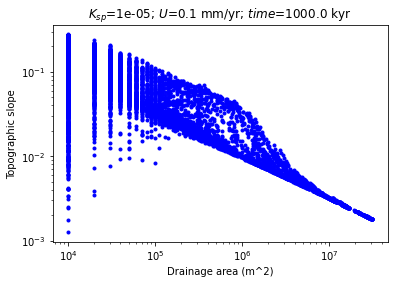

In [9]:
# Code Block 9

plt.loglog(
    mg1.at_node["drainage_area"][np.where(mg1.node_y[mg1.core_nodes]>200)],
    mg1.at_node["topographic__steepest_slope"][np.where(mg1.node_y[mg1.core_nodes]>200)],
    "b.",
)
plt.ylabel("Topographic slope")
plt.xlabel("Drainage area (m^2)")
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr"

plt.title(title_text)

It is slightly easier to interpret slope-area data when we look at a single channel or channels, rather than the entire landscape. Below we plot the profile and slope-area data for the three largest channels on the landscape.

Text(0.5, 1.0, '$K_{sp}$=1e-05; $U$=0.1 mm/yr; $time$=1000.0 kyr')

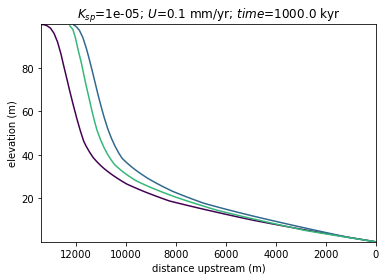

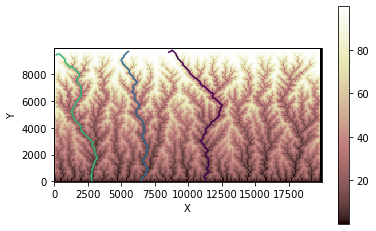

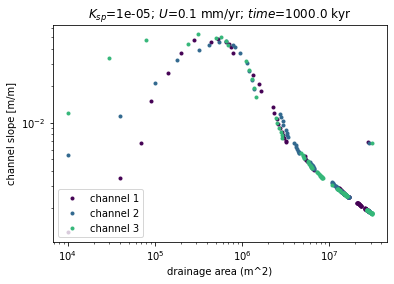

In [10]:
# Code Block 10

# profile the largest channels, set initially to find the mainstem channel in the three biggest watersheds
# you can change the number of watersheds, or choose to plot all the channel segments in the watershed that
# have drainage area below the threshold (here we have set the threshold to the area of a grid cell).
prf = ChannelProfiler(mg1,
                      number_of_watersheds=3,
                      main_channel_only=True,
                      minimum_channel_threshold=dxy**2)
prf.run_one_step()

# plot the elevation as a function of distance upstream
plt.figure(1)
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr"
prf.plot_profiles(xlabel='distance upstream (m)',
                  ylabel='elevation (m)',
                  title=title_text)
ax=plt.gca()
ax.invert_xaxis()

# plot the location of the channels in map view
plt.figure(2)
prf.plot_profiles_in_map_view()

# slope-area data in just the profiled channels
plt.figure(3)
for i, outlet_id in enumerate(prf.data_structure):
    for j, segment_id in enumerate(prf.data_structure[outlet_id]):
        if j == 0:
            label = "channel {i}".format(i=i + 1)
        else:
            label = '_nolegend_'
        segment = prf.data_structure[outlet_id][segment_id]
        profile_ids = segment["ids"]
        color = segment["color"]
        plt.loglog(
            mg1.at_node["drainage_area"][profile_ids],
            mg1.at_node["topographic__steepest_slope"][profile_ids],
            '.',
            color=color,
            label=label,
        )

plt.legend(loc="lower left")
plt.xlabel("drainage area (m^2)")
plt.ylabel("channel slope [m/m]")
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr"
plt.title(title_text)

The chi index is a useful way to quantitatively interpret fluvial channels. Below we plot the chi index in the three largest channels and also a chi map across the entire landscape. 

Text(0.5, 1.0, '$K_{sp}$=1e-05; $U$=0.1 mm/yr; $time$=1000.0 kyr; concavity=0.5')

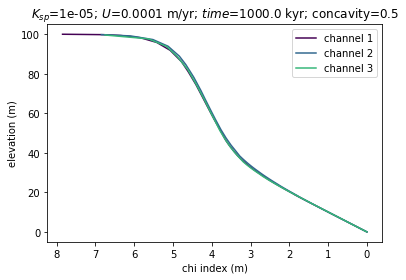

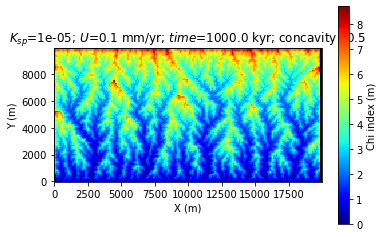

In [11]:
# Code Block 11

# calculate the chi index
cf.calculate_chi()

# # chi-elevation plots in the profiled channels
plt.figure(4)

for i, outlet_id in enumerate(prf.data_structure):
    for j, segment_id in enumerate(prf.data_structure[outlet_id]):
        if j == 0:
            label = "channel {i}".format(i=i + 1)
        else:
            label = '_nolegend_'
        segment = prf.data_structure[outlet_id][segment_id]
        profile_ids = segment["ids"]
        color = segment["color"]
        plt.plot(
            mg1.at_node["channel__chi_index"][profile_ids],
            mg1.at_node["topographic__elevation"][profile_ids],
            color=color,
            label=label,
        )
        
ax=plt.gca()
ax.invert_xaxis()
plt.xlabel("chi index (m)")
plt.ylabel("elevation (m)")
plt.legend(loc="upper right")
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]} m/yr; $time$={total_time/1000} kyr; concavity={theta}"
plt.title(title_text)

# chi map
plt.figure(5)
imshow_grid(
    mg1,
    "channel__chi_index",
    grid_units=("m", "m"),
    var_name="Chi index (m)",
    cmap="jet",
)
title_text = f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr; concavity={theta}"
plt.title(title_text)

The channel steepness index is another useful index to quantify fluvial channels. Below we plot the steepness index in the same three largest channels, and also plot steepness index across the grid.

Text(0.5, 1.0, '$K_{sp}$=1e-05; $U$=0.1 mm/yr; $time$=1000.0 kyr; concavity=0.5')

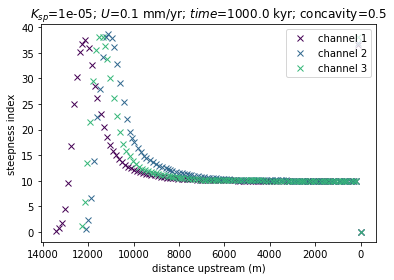

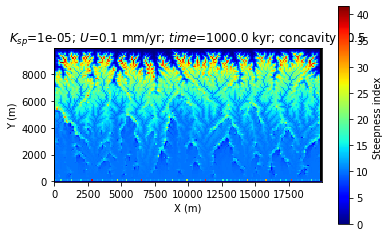

In [12]:
# Code Block 12

# calculate channel steepness
sf.calculate_steepnesses()

# plots of steepnes vs. distance upstream in the profiled channels
plt.figure(6)

for i, outlet_id in enumerate(prf.data_structure):
    for j, segment_id in enumerate(prf.data_structure[outlet_id]):
        if j == 0:
            label = "channel {i}".format(i=i + 1)
        else:
            label = '_nolegend_'
        segment = prf.data_structure[outlet_id][segment_id]
        profile_ids = segment["ids"]
        distance_upstream = segment["distances"]
        color = segment["color"]
        plt.plot(
            distance_upstream,
            mg1.at_node["channel__steepness_index"][profile_ids],
            'x',
            color=color,
            label=label,
        )

ax=plt.gca()
ax.invert_xaxis()
plt.xlabel("distance upstream (m)")
plt.ylabel("steepness index")
plt.legend(loc="upper right")
plt.title(
    f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr; concavity={theta}"
)

# channel steepness map
plt.figure(7)
imshow_grid(
    mg1,
    "channel__steepness_index",
    grid_units=("m", "m"),
    var_name="Steepness index ",
    cmap="jet",
)
#title_text = ("$K_{sp}$=" + str(K_sp) + "; $time$=" + str(total_time) +
#              "yr; $dx$=" + str(dxy) + "m" + "; concavity=" + str(theta))
plt.title(
    f"$K_{{sp}}$={K_sp}; $U$={uplift_rate[50]*1000} mm/yr; $time$={total_time/1000} kyr; concavity={theta}"
)

After running every code block once, has the landscape reached steady state? Answer: NO! How do you know? After you think about this, you are ready to complete this project.

Answer the following questions using the code above and below. All answers and supporting figures (produced using the code) should be embedded in a file (e.g. ppt, txt, link to a google doc, Jupyter Notebook, ...) that you hand in. Code Blocks 8-12 produce different figures that you may find useful. You can use any or all of these different figures to help you with the questions below.  

Anything with a question mark should be answered in the file that you hand in. Make sure your write in full sentences and proofread the document that you hand in.

1. **Steady state with low rock uplift rate.** Using the parameters provided in the initial notebook, run the landscape to steady state. (Note that you can keep running the main evolution loop - Code Block 7 - and the different plotting blocks without running the code blocks above them. You may also want to change $tmax$ in Code Block 4.) How did you decide that the landscape reached steady state? [These landscapes may not reach a perfect steady state. Close is fine.] Include appropriate plots. 

2. **Steady-state landscape with higher rock uplift rate.** Now increase rock uplift uniformly by a factor of 2 to 0.0002 m/yr (Code Block 6). Rerun the entire notebook, and continue to run the main evolution loop - Code Block 7 - until the landscape reaches steady state. Provide a plot that illustrates that the landscape is in steady state. What aspects of the landscape have changed in comparison with the base landscape from question 1?

3. **Increase erodibility.** Now increase $K_{sp}$ to 2E-5 (Code Block 5). Make sure rock uplift rate is set to the original value of 0.0001 m/yr (Code Block 6). Rerun the entire notebook, and continue to run the main evolution loop - Code Block 7 - until the landscape reaches steady state. Compare this landscape with the one produced in the first question. What, if anything, has changed? 

4. **General Reflection** In 4 sentences or less, describe how the steady-state landscape form changes with rock uplift rate? What metrics could you measure in the landscape that would illustrate higher rock uplift rate? In 4 sentences or less, describe how the steady-state landscape form changes with erodibility? What metrics could you measure in different landscapes that would illustrate they have different erodibilities? What might lead to different erodibilities in different landscapes?

5. **Final Reflection** Was your initial insight into how parameters would affect the landscape correct? Discuss in 6 sentences or less.